In [1]:
import torch
from matplotlib import pyplot as plt
from flow_matching.latent.training_ae_cond import CondAETrainer
from flow_matching.whar.stft import istft_transform, plot_spectrogram_grid
from flow_matching.whar.sampler import WHARSamplerRAW
from flow_matching.whar.ae_cond import CondSpectrogramAE
from flow_matching.whar.ae_losses import ae_mse
from flow_matching.whar.stft import decompress_stft

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(device)

mps


In [3]:
sampler = WHARSamplerRAW()

Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Validating common format...
[########################################] | 100% Completed | 843.35 ms
Common format validated.
Checking windowing...
Loading config hash...
Windowing exists.
subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]
train: 7046 | val: 782 | test: 1671
Postprocessing...


Loading windows: 100%|██████████| 9499/9499 [00:06<00:00, 1368.78it/s]


Getting normalization parameters...
Loading config hash...
Creating normalization parameters hash...
Loading normalization parameters hash...


Loading samples: 100%|██████████| 9499/9499 [00:02<00:00, 3882.17it/s]


In [6]:
ae = CondSpectrogramAE(latent_channels=20)
trainer = CondAETrainer(
    ae, sampler.train_loader, sampler.val_loader, ae_mse, track=True
)

In [7]:
trainer.train(num_epochs=30, device=device, lr=1e-3)

Training model with size: 7.865 MiB


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


Loss: 0.021, MSE: 0.066, Log Mag: 0.131, Log Mag Phase: 0.773, Spect Conv: 0.648


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Loss: 0.014, MSE: 0.029, Log Mag: 0.076, Log Mag Phase: 0.445, Spect Conv: 0.408


100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


Loss: 0.010, MSE: 0.017, Log Mag: 0.057, Log Mag Phase: 0.302, Spect Conv: 0.313


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Loss: 0.008, MSE: 0.011, Log Mag: 0.046, Log Mag Phase: 0.228, Spect Conv: 0.254


100%|██████████| 1/1 [00:00<00:00,  1.72it/s]


Loss: 0.007, MSE: 0.008, Log Mag: 0.040, Log Mag Phase: 0.195, Spect Conv: 0.221


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Loss: 0.006, MSE: 0.007, Log Mag: 0.036, Log Mag Phase: 0.167, Spect Conv: 0.199


100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Loss: 0.006, MSE: 0.006, Log Mag: 0.034, Log Mag Phase: 0.154, Spect Conv: 0.187


100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Loss: 0.006, MSE: 0.005, Log Mag: 0.032, Log Mag Phase: 0.146, Spect Conv: 0.171


100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Loss: 0.005, MSE: 0.005, Log Mag: 0.030, Log Mag Phase: 0.134, Spect Conv: 0.166


100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


Loss: 0.005, MSE: 0.005, Log Mag: 0.032, Log Mag Phase: 0.143, Spect Conv: 0.171


100%|██████████| 1/1 [00:00<00:00,  1.62it/s]


Loss: 0.005, MSE: 0.004, Log Mag: 0.029, Log Mag Phase: 0.126, Spect Conv: 0.158


100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


Loss: 0.005, MSE: 0.004, Log Mag: 0.029, Log Mag Phase: 0.125, Spect Conv: 0.156


100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


Loss: 0.005, MSE: 0.004, Log Mag: 0.029, Log Mag Phase: 0.119, Spect Conv: 0.155


100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


Loss: 0.004, MSE: 0.004, Log Mag: 0.027, Log Mag Phase: 0.115, Spect Conv: 0.150


100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Loss: 0.004, MSE: 0.004, Log Mag: 0.028, Log Mag Phase: 0.109, Spect Conv: 0.150


100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


Loss: 0.004, MSE: 0.004, Log Mag: 0.027, Log Mag Phase: 0.107, Spect Conv: 0.146


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.027, Log Mag Phase: 0.120, Spect Conv: 0.144


100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.026, Log Mag Phase: 0.101, Spect Conv: 0.142


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.026, Log Mag Phase: 0.097, Spect Conv: 0.140


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.027, Log Mag Phase: 0.102, Spect Conv: 0.144


100%|██████████| 1/1 [00:00<00:00,  1.65it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.026, Log Mag Phase: 0.101, Spect Conv: 0.139


100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.026, Log Mag Phase: 0.097, Spect Conv: 0.141


100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.025, Log Mag Phase: 0.097, Spect Conv: 0.140


100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.025, Log Mag Phase: 0.101, Spect Conv: 0.139


100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.026, Log Mag Phase: 0.097, Spect Conv: 0.143


100%|██████████| 1/1 [00:00<00:00,  1.73it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.025, Log Mag Phase: 0.094, Spect Conv: 0.138


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.026, Log Mag Phase: 0.095, Spect Conv: 0.140


100%|██████████| 1/1 [00:00<00:00,  1.66it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.025, Log Mag Phase: 0.094, Spect Conv: 0.138


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Loss: 0.004, MSE: 0.003, Log Mag: 0.025, Log Mag Phase: 0.089, Spect Conv: 0.137


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Loss: 0.004, MSE: 0.003, Log Mag: 0.024, Log Mag Phase: 0.087, Spect Conv: 0.132


In [8]:
torch.save(ae.state_dict(), "cond_ae_small.pt")

In [ ]:
ae.load_state_dict(torch.load("cond_ae.pt"))

<All keys matched successfully>

tensor(-0.9253) tensor(0.7060)


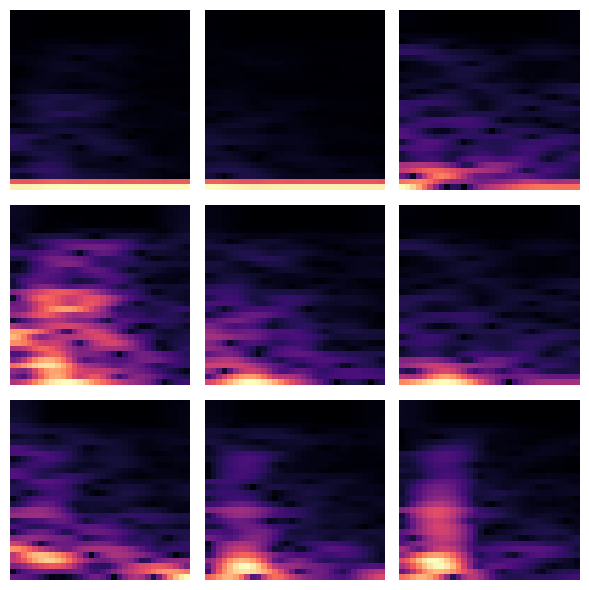

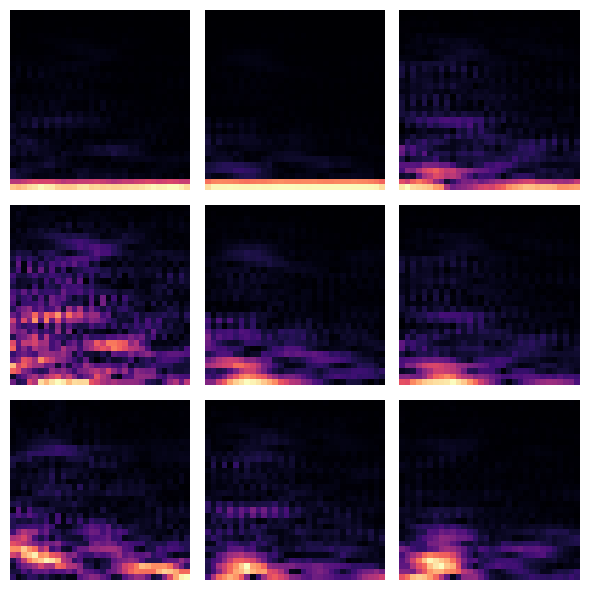

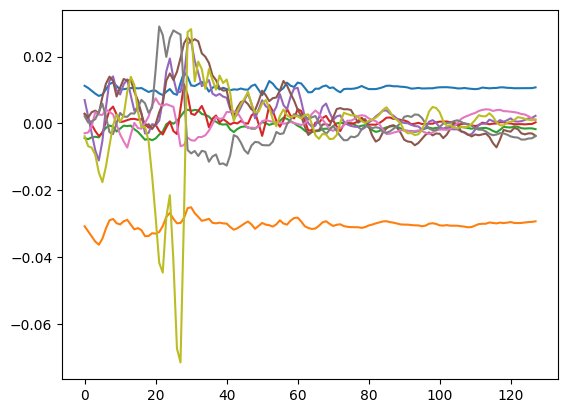

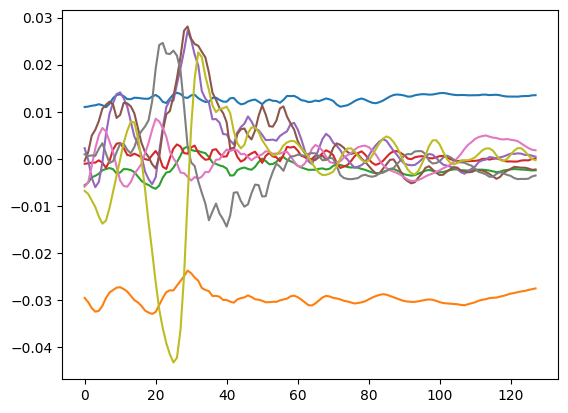

In [ ]:
x, y = next(iter(sampler.train_loader))
out, z = ae(x.to(device), y.to(device))

B, C, H, W = out.shape202022222222
out = out.reshape(B, C // 2, 2, H, W)[0].detach().cpu()

print(out.min(), out.max())


plot_spectrogram_grid(x.reshape(B, C // 2, 2, H, W)[0])
plot_spectrogram_grid(out)


recon = istft_transform(decompress_stft(x.reshape(B, C // 2, 2, H, W)[0]))
plt.plot(recon)
plt.show()

recon = istft_transform(decompress_stft(out))
plt.plot(recon)
plt.show()